In [7]:
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd

In [8]:
ruta="/Users/rodri/Documents/Cursos en la FC/Seminario y Diplomado/Ejemplos/"
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(ruta+bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [9]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random=bd_escuelas.sample(n=15,random_state=9998)[["escuela"]]
escuelas_random["f_seleccion"]=1

In [10]:
bd_escuelas=pd.merge(bd_escuelas, escuelas_random, how="left", on=["escuela"])
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].fillna(0)
bd_escuelas["f_seleccion"]=bd_escuelas["f_seleccion"].astype(int)
bd_escuelas

,escuela,LSAT,GPA,f_seleccion
0,1,622,3.23,0
1,2,542,2.83,0
2,3,579,3.24,0
3,4,653,3.12,0
4,5,606,3.09,0
...,...,...,...,...
77,78,590,3.15,0
78,79,558,2.81,0
79,80,611,3.16,0
80,81,564,3.02,0


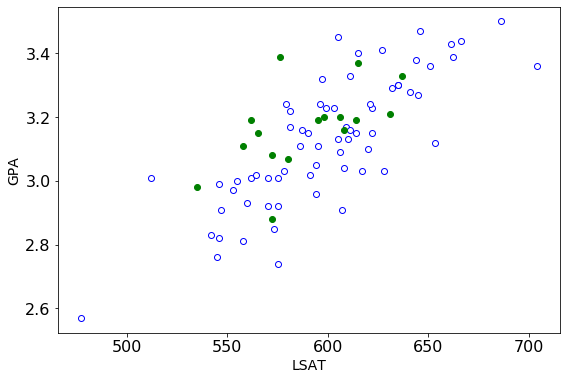

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
plot(bd_escuelas[bd_escuelas["f_seleccion"]==0].LSAT, 
         bd_escuelas[bd_escuelas["f_seleccion"]==0].GPA, 'o', color='blue',markerfacecolor='white')
plot(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, 
         bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA, 'o', color='green')

xlabel("LSAT",size=14)
ylabel("GPA",size=14)
xticks(fontsize=16)
yticks(fontsize=16)
show()

In [12]:
corr, _ = spearmanr(bd_escuelas[bd_escuelas["f_seleccion"]==1].LSAT, bd_escuelas[bd_escuelas["f_seleccion"]==1].GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.659


In [13]:
corr, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.753


In [33]:
#De tarea, obtener el error estandar de la correlacion y mostrar para que N la precisión con respecto a la correlación de la muestra total
#Grafique los histogramas de las correlaciones
#Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

In [17]:
bd="lineal_horm.xlsx"
bd_horm=pd.read_excel(ruta+bd)
bd_horm

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4
9,B,376,16.3


In [18]:
from sklearn import linear_model

In [19]:
reg = linear_model.LinearRegression()

In [20]:
X = bd_horm[["horas"]]
y = bd_horm[["monto"]]

In [21]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
reg.coef_

array([[-0.0574463]])

In [23]:
reg.intercept_

array([34.16752817])

In [25]:
Y_pred = reg.predict(X) 
Y_pred

array([[28.4803446 ],
       [25.43569077],
       [17.33576266],
       [25.26335188],
       [22.90805363],
       [31.12287434],
       [23.59740921],
       [24.3442111 ],
       [31.18032064],
       [12.56771986],
       [12.05070318],
       [11.0741161 ],
       [32.50158551],
       [29.80160947],
       [17.16342376],
       [25.49313707],
       [23.9995333 ],
       [22.16125175],
       [27.33141863],
       [23.36762402],
       [27.56120382],
       [29.11225389],
       [30.83564285],
       [31.35265954],
       [25.55058337],
       [28.02077421],
       [26.98674084]])

In [26]:
y_estim=Y_pred.reshape(-1)
y_estim

array([28.4803446 , 25.43569077, 17.33576266, 25.26335188, 22.90805363,
       31.12287434, 23.59740921, 24.3442111 , 31.18032064, 12.56771986,
       12.05070318, 11.0741161 , 32.50158551, 29.80160947, 17.16342376,
       25.49313707, 23.9995333 , 22.16125175, 27.33141863, 23.36762402,
       27.56120382, 29.11225389, 30.83564285, 31.35265954, 25.55058337,
       28.02077421, 26.98674084])

In [27]:
x=X.to_numpy().reshape(-1)
x

array([ 99, 152, 293, 155, 196,  53, 184, 171,  52, 376, 385, 402,  29,
        76, 296, 151, 177, 209, 119, 188, 115,  88,  58,  49, 150, 107,
       125])

In [28]:
y_real=y.to_numpy()
y_real=y_real.reshape(-1)
y_real
n=len(y_real)
y_real

array([25.8, 20.5, 14.3, 23.2, 20.6, 31.1, 20.9, 20.9, 30.4, 16.3, 11.6,
       11.8, 32.5, 32. , 18. , 24.1, 26.5, 25.8, 28.8, 22. , 29.7, 28.9,
       32.8, 32.5, 25.4, 31.7, 28.5])

In [30]:
residual=y_real-y_estim
residual

array([-2.68034460e+00, -4.93569077e+00, -3.03576266e+00, -2.06335188e+00,
       -2.30805363e+00, -2.28743430e-02, -2.69740921e+00, -3.44421110e+00,
       -7.80320642e-01,  3.73228014e+00, -4.50703175e-01,  7.25883902e-01,
       -1.58551177e-03,  2.19839053e+00,  8.36576241e-01, -1.39313707e+00,
        2.50046670e+00,  3.63874825e+00,  1.46858137e+00, -1.36762402e+00,
        2.13879618e+00, -2.12253889e-01,  1.96435715e+00,  1.14734046e+00,
       -1.50583369e-01,  3.67922579e+00,  1.51325916e+00])

Podemos obtener el error estándar del estimador de la siguiente manera
$$
\begin{equation}
\hat{se}_{\beta}=\sqrt{\frac{\sum_{i} \epsilon_{i}^{2}}{(n-2)\sum_{i}(x-\bar{x})^{2}}}
\end{equation}
$$

In [31]:
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n)
err_reg=np.sqrt(num/den)
err_reg

0.004295652626358282

In [32]:
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n-2)
err=np.sqrt(num/den)
err

0.0044641731603115384

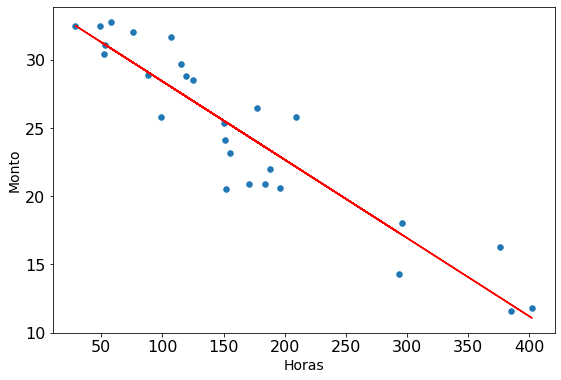

In [33]:
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X, y,s=30)
plt.plot(X, Y_pred, color='red')
xlabel("Horas",size=14)
ylabel("Monto",size=14)
xticks(fontsize=16)
yticks(fontsize=16)
show()

In [109]:
#Calculemos el error estandar de las estimaciones de los parámetros haciendo bootstrap sobre los residuales

In [34]:
df = pd.DataFrame(residual,
                 columns=['residual'])
df["x"]=x
df

,residual,x
0,-2.680345,99
1,-4.935691,152
2,-3.035763,293
3,-2.063352,155
4,-2.308054,196
5,-0.022874,53
6,-2.697409,184
7,-3.444211,171
8,-0.780321,52
9,3.732280,376


In [35]:
r_i=np.random.choice(residual,len(residual),replace=True)
df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
df_aux

,residual,x
0,-2.680345,99
1,-2.680345,99
2,-0.022874,53
3,1.513259,125
4,1.513259,125
5,-3.444211,171
6,-3.444211,171
7,2.138796,115
8,-0.001586,29
9,1.964357,58


In [36]:
x_j=df_aux[["x"]].to_numpy().reshape(-1)
den=sum((x_j-np.mean(x_j))**2)
num=sum(r_i**2)/(n)
err=np.sqrt(num/den)
err

0.004658108702842425

In [37]:
simul=1000
res_boost= np.array( [ ])
for i in range(0,simul):
    r_i=np.random.choice(residual,len(residual),replace=True)
    df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
    df_aux=pd.merge(df_aux, df, how="inner", on=["residual"])
    df_aux
    x_i=df_aux[["x"]].to_numpy().reshape(-1)
    den=sum((x_i-np.mean(x_i))**2)
    num=sum(r_i**2)/(n)
    err=np.sqrt(num/den)
    res_boost = np.append(res_boost,err)

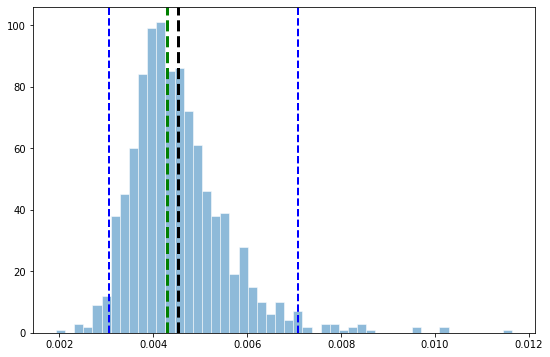

Error Estándar sin Bootsrap: 0.004295652626358282
Promedio de Error Estándar de la muestras Bootstrap: 0.004533639910046316
Promedio de Error Estándar de la muestras Bootstrap: 0.004533639910046316
( 0.003053651466686246 , 0.007075166303170905 )


In [39]:
fig, ax = plt.subplots(figsize=(9,6))
hist(res_boost,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err_reg,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(res_boost),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(res_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(res_boost,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err_reg)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("(", percentile(res_boost,2.5),",",percentile(res_boost,97.5),")")